In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
#Give dataset path
train_path = r'C:\Users\Hi\SKETCH\small2_v1\train'
test_path = r'C:\Users\Hi\SKETCH\small2_v1\test'

Working with 72 images
Image examples: 
649.png


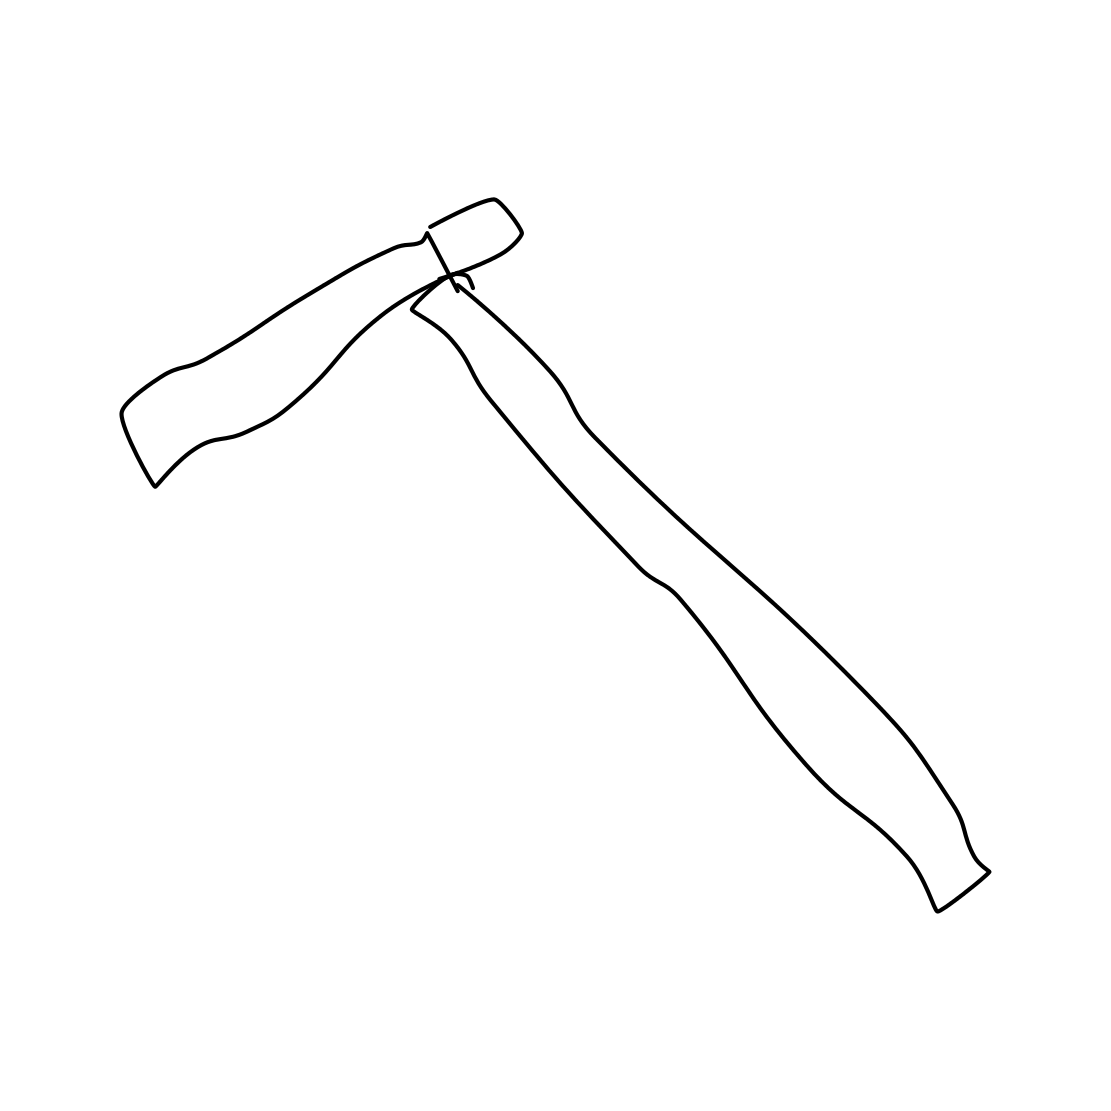

650.png


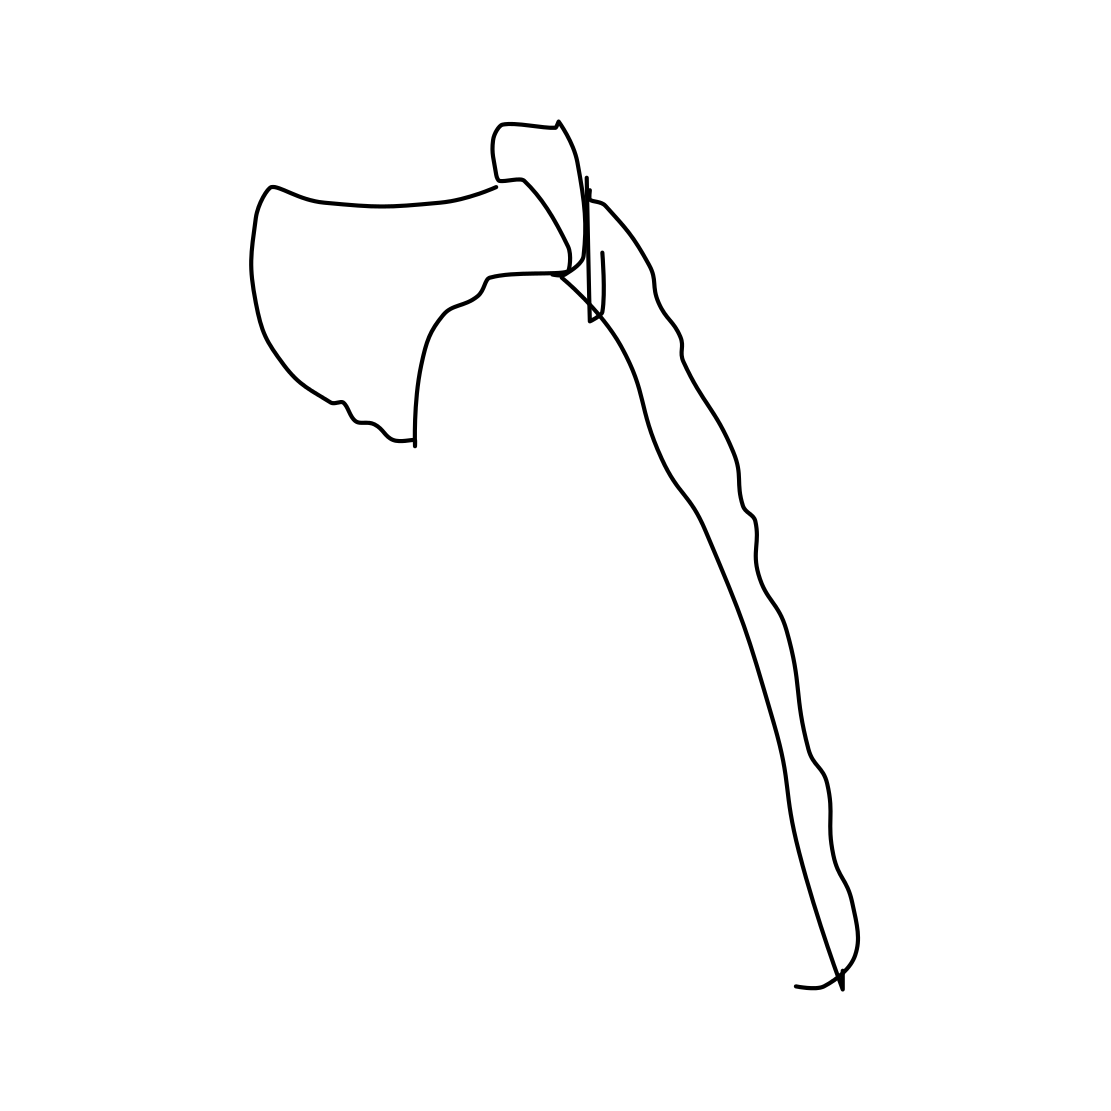

651.png


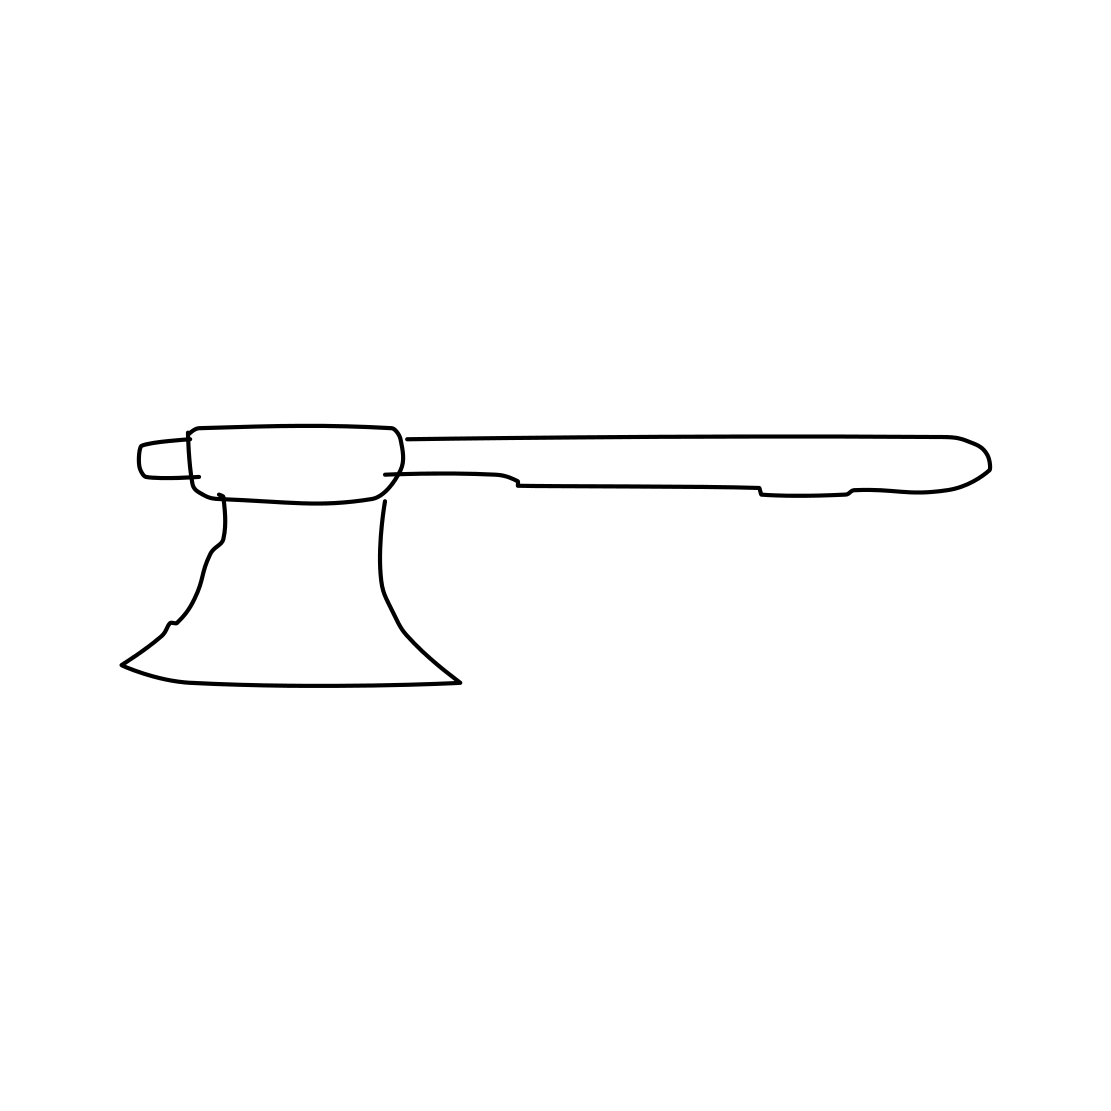

652.png


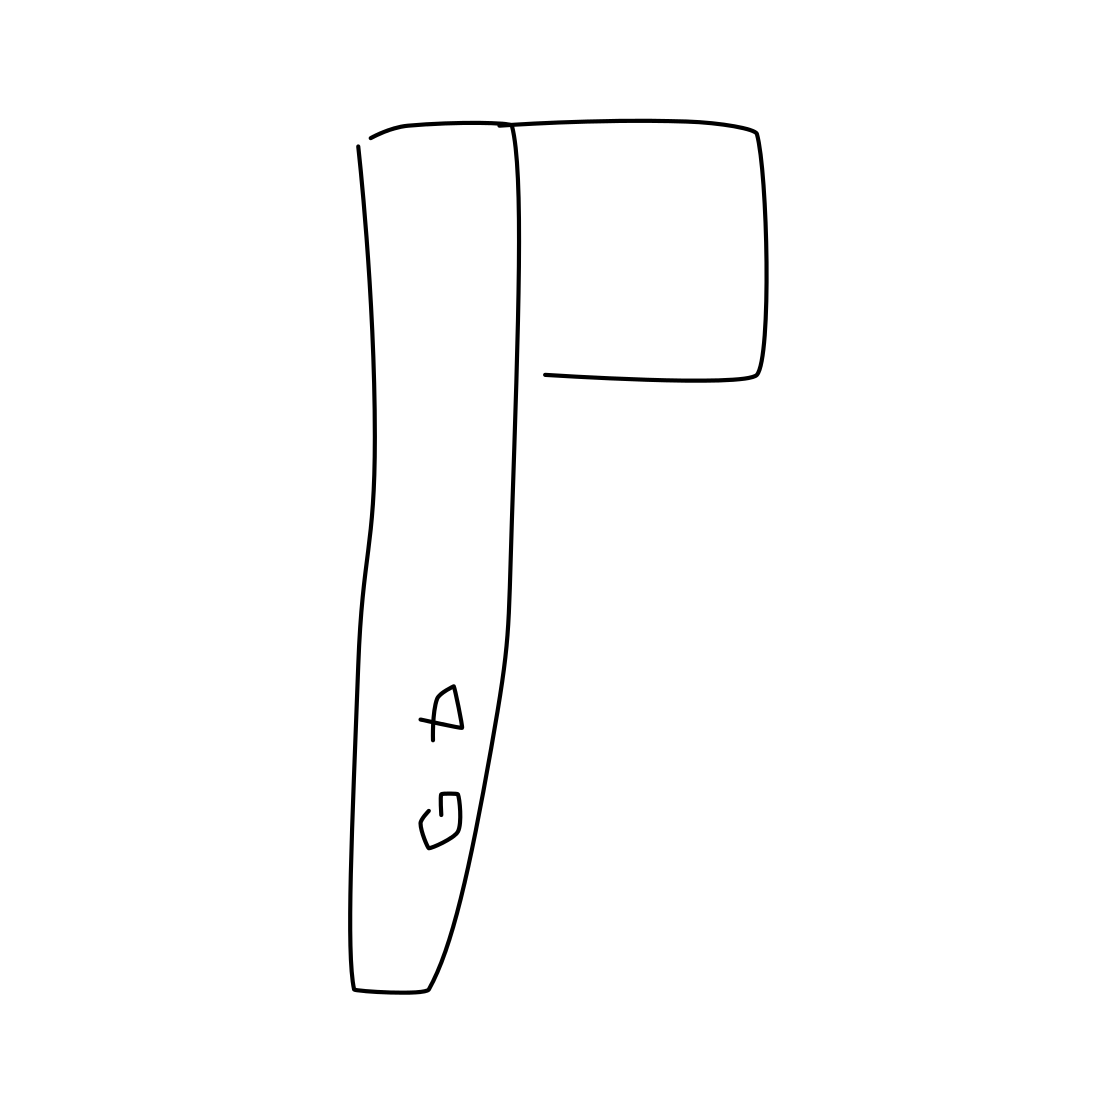

653.png


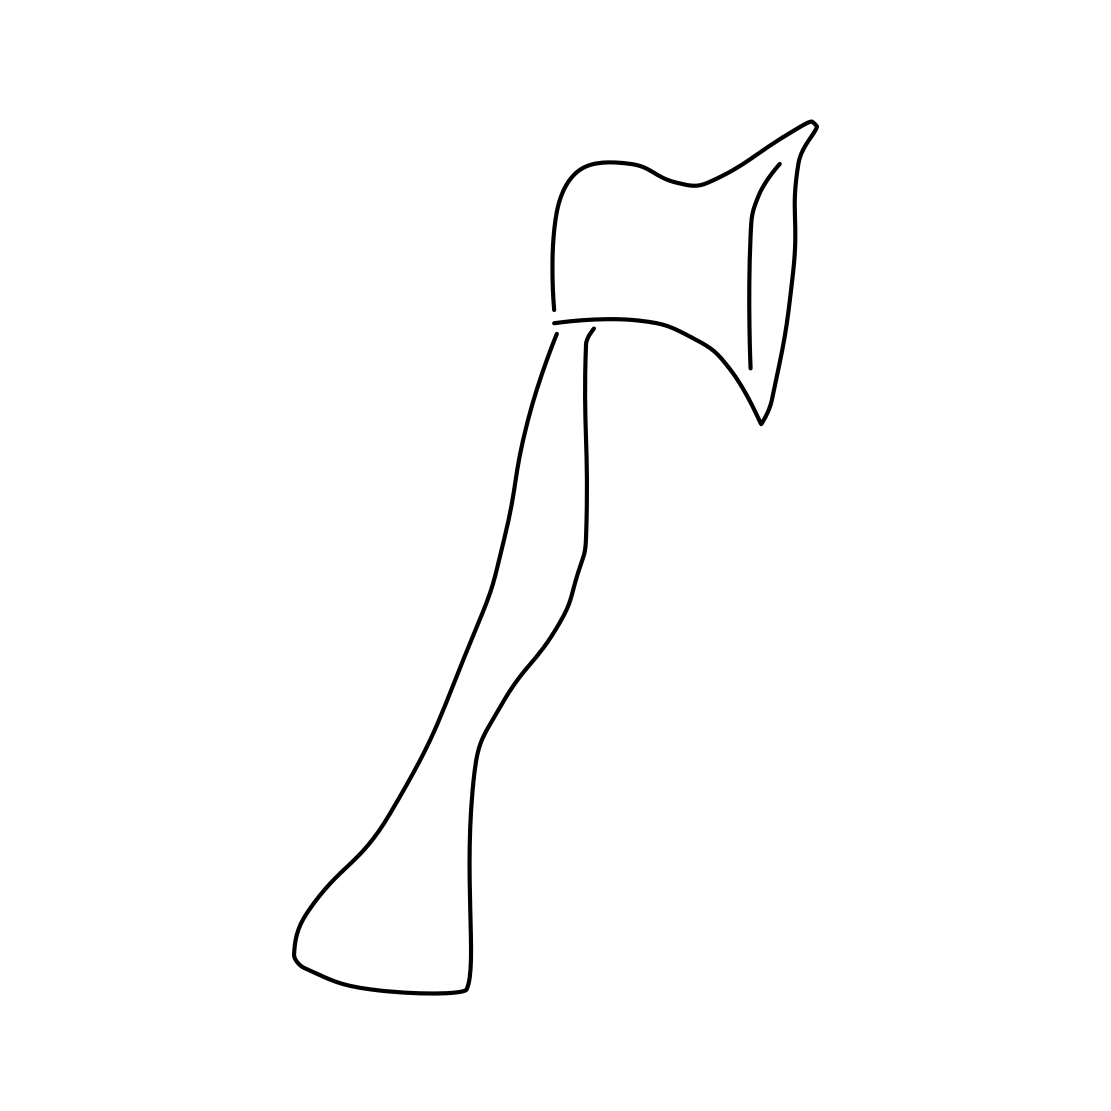

654.png


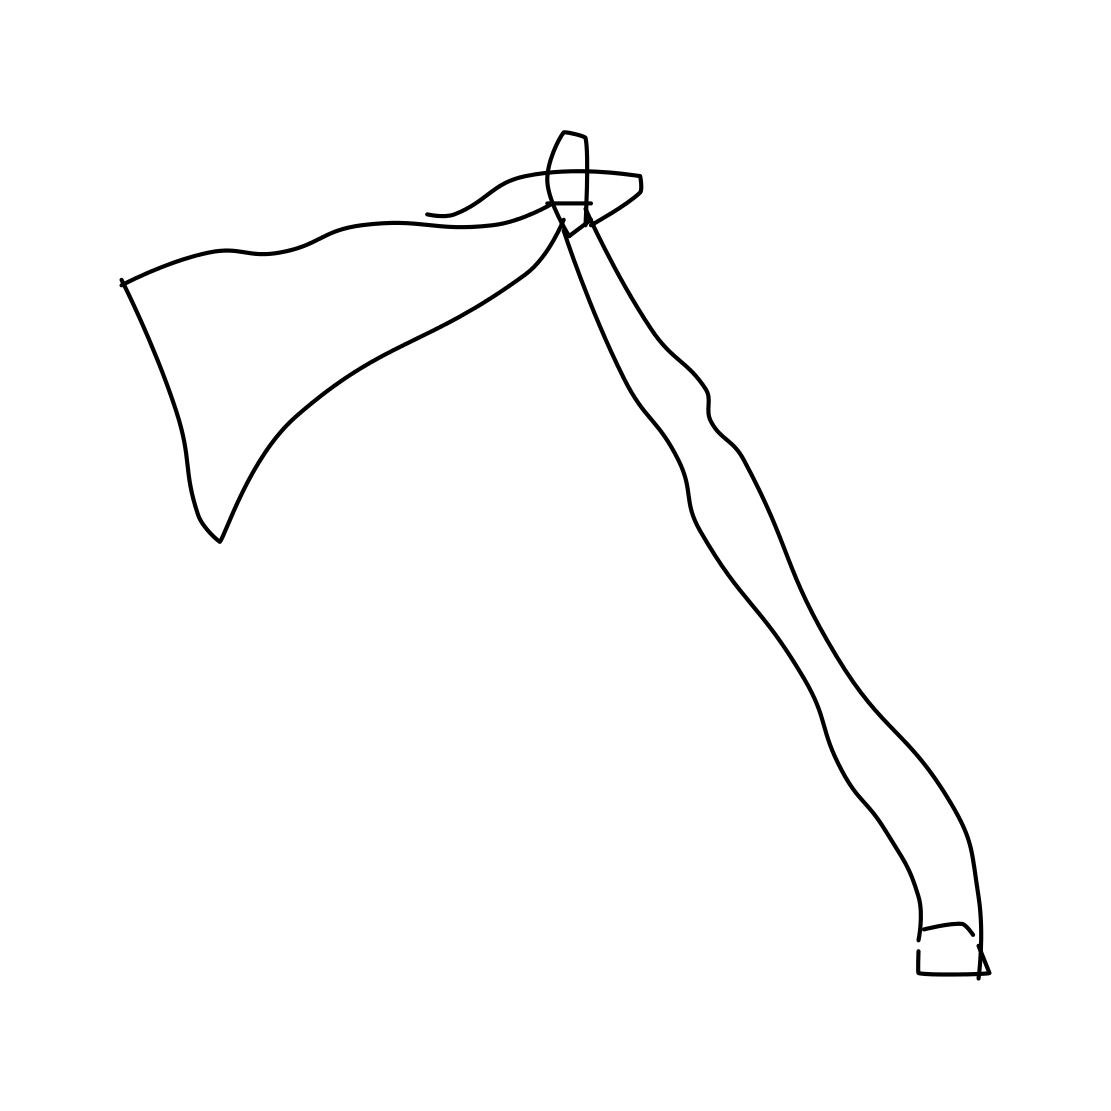

655.png


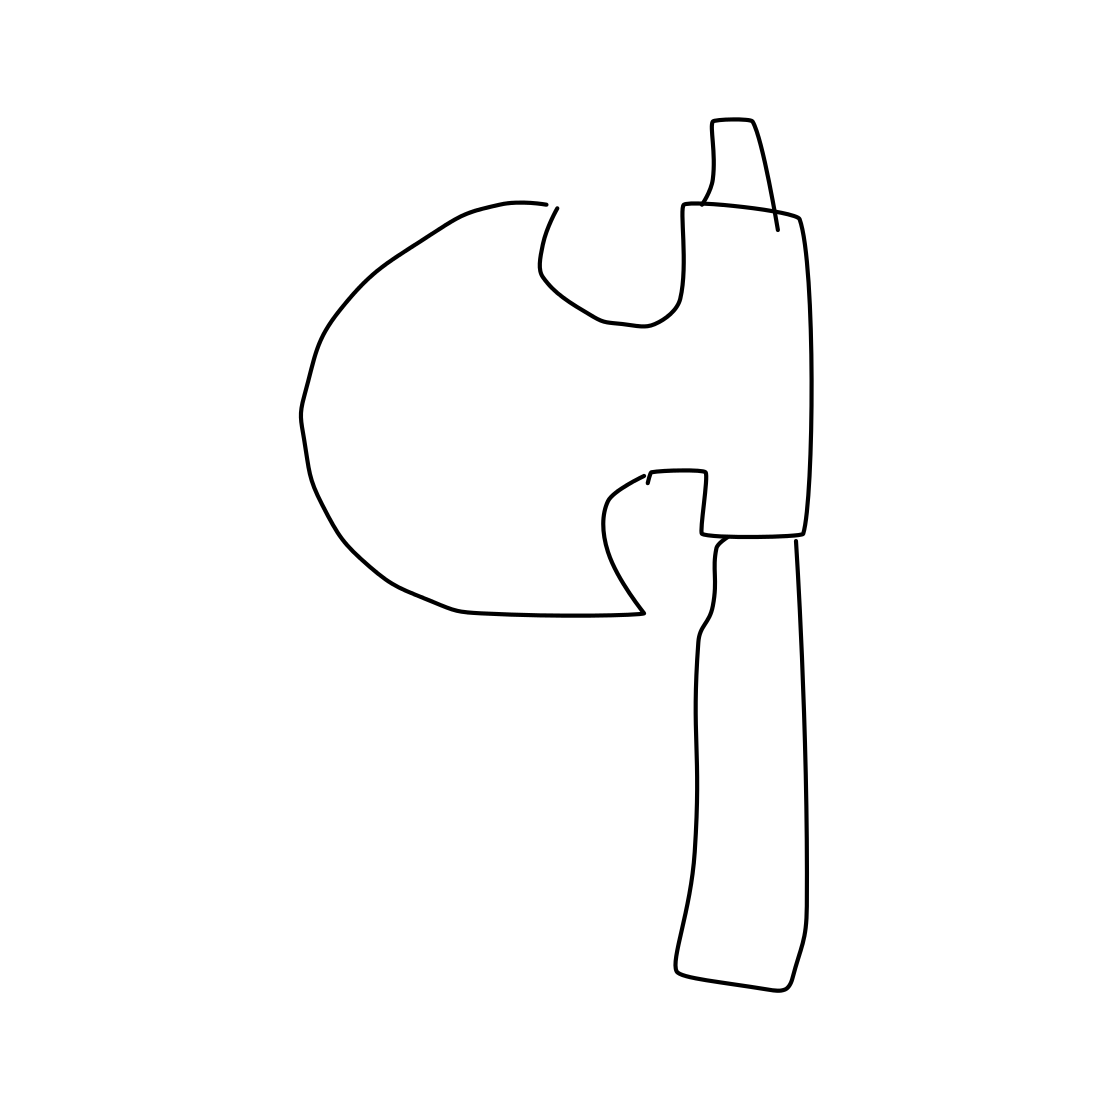

656.png


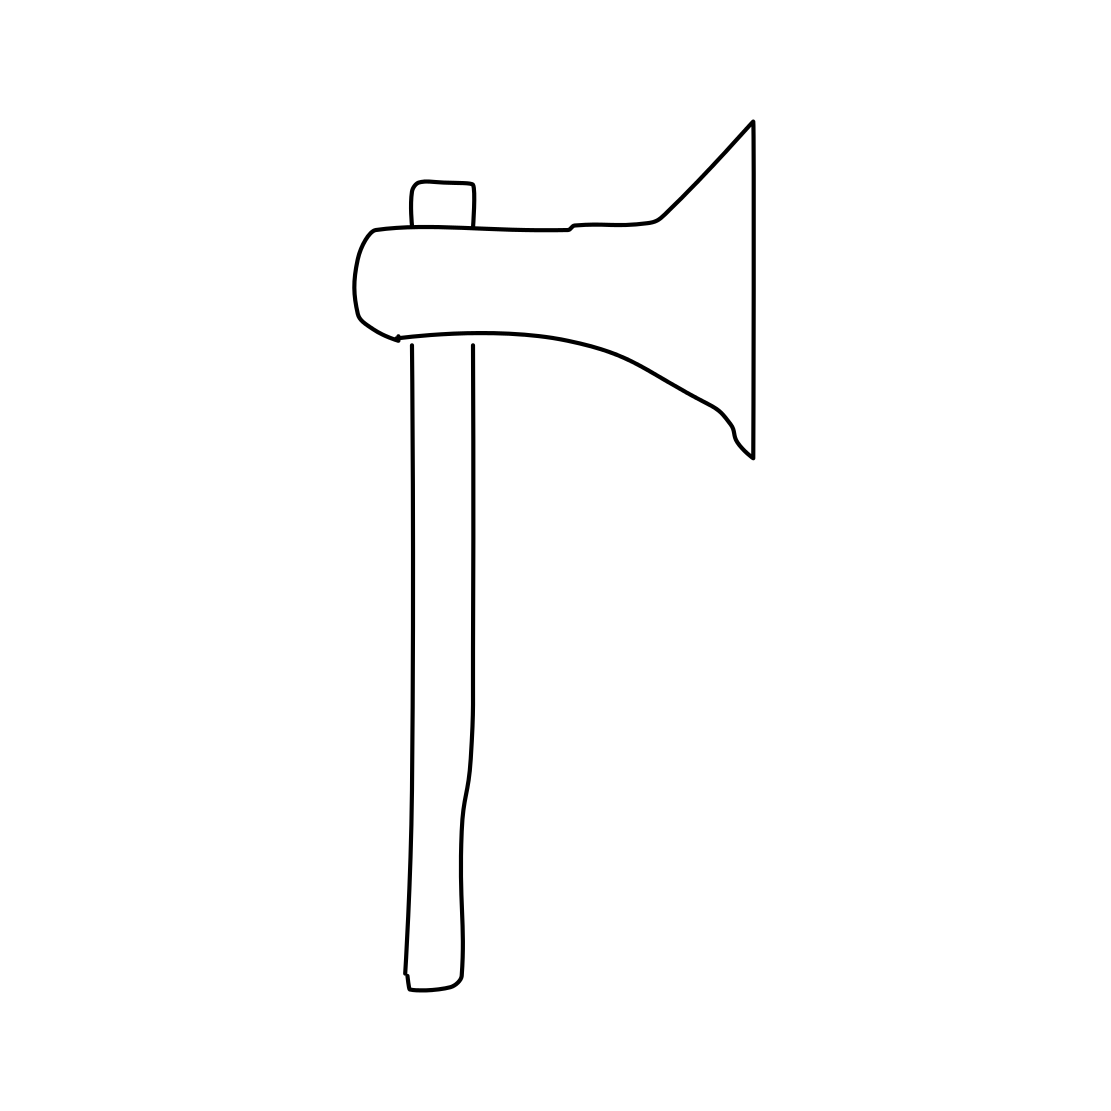

657.png


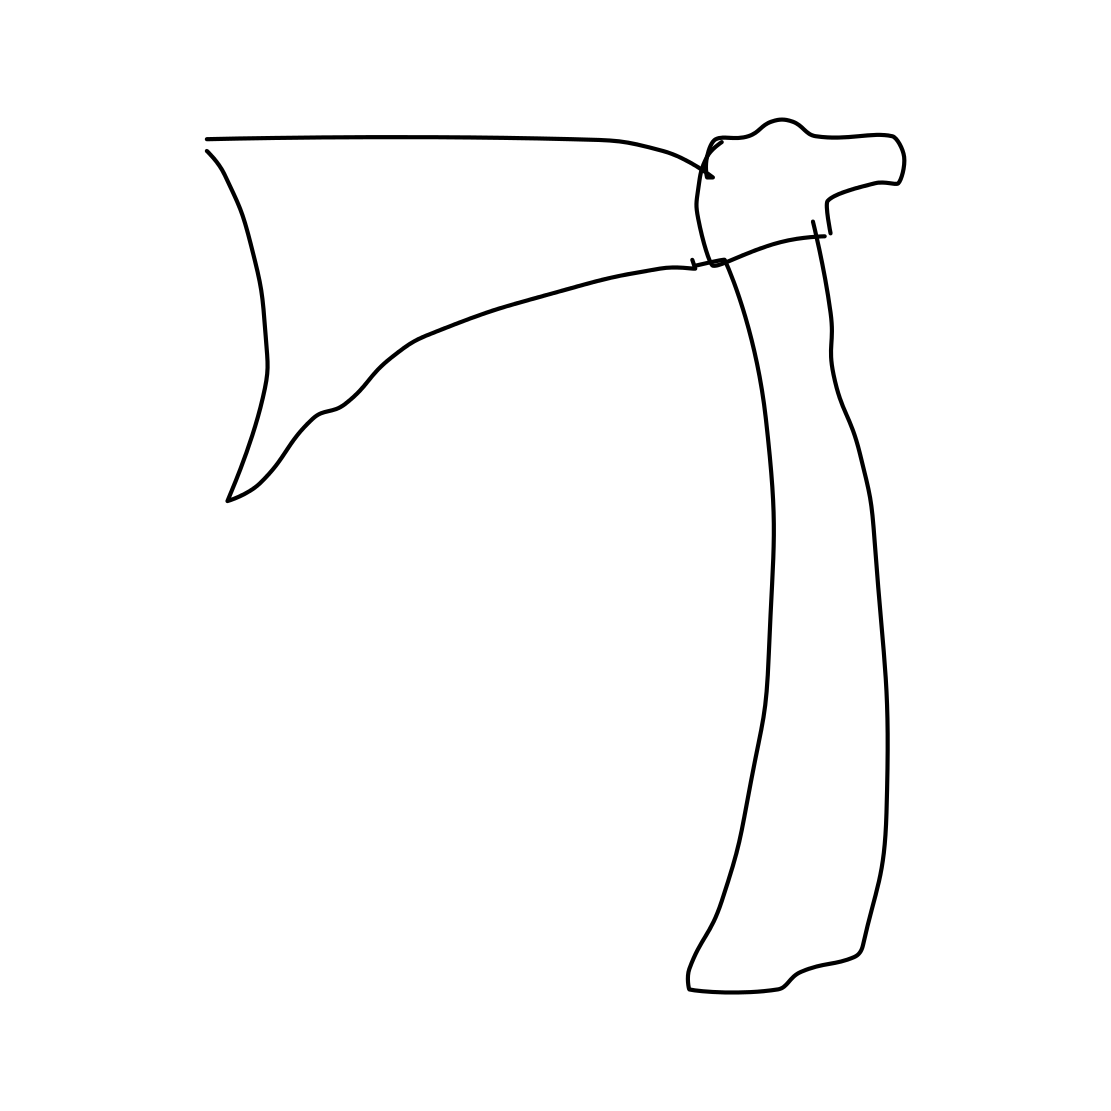

658.png


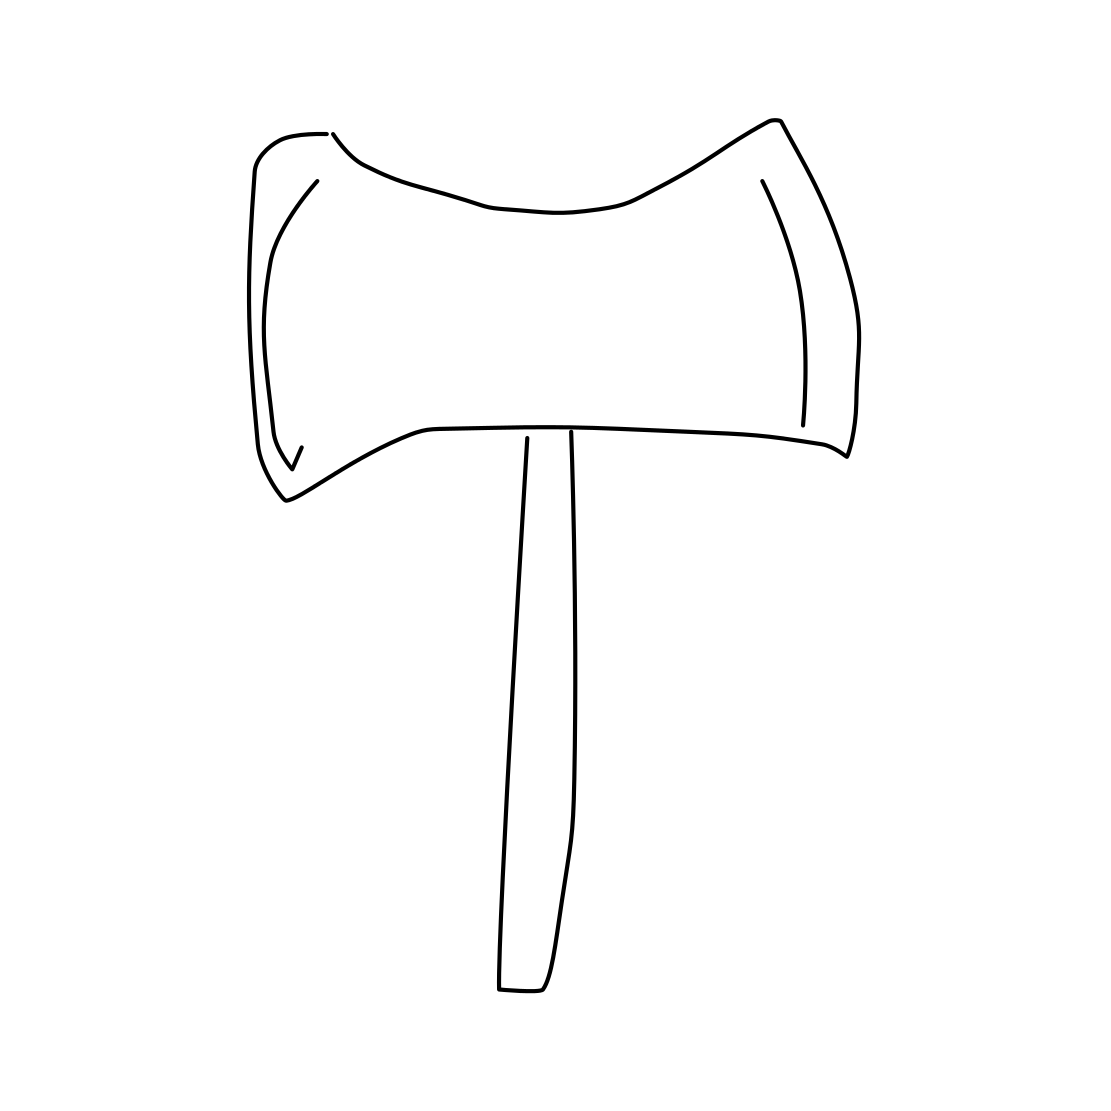

In [4]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/axe'


onlyantfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyantfiles)))
print("Image examples: ")


for i in range(10):
    print(onlyantfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyantfiles[i], width=240, height=240))

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob(r'C:\Users\Hi\SKETCH\small2_v1\train\*')
print(len(folders))

10


In [8]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 720 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 10 classes.


In [14]:
# from datetime import datetime
# from keras.callbacks import ModelCheckpoint



# checkpoint = ModelCheckpoint(filepath='10class_v1.h5', 
#                                verbose=2, save_best_only=True)

# callbacks = [checkpoint]

# start = datetime.now()

# model_history=model.fit(
#   train_set,
#   validation_data=test_set,
#   epochs=10,
#   steps_per_epoch=10,
#   validation_steps=32,
#     callbacks=callbacks ,verbose=2)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

In [15]:
import tensorflow
model = tensorflow.keras.models.load_model('10class_v1.h5')

In [17]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import cv2
# load the model
# model = VGG16()
# load an image from file
# path = r'C:\Users\Hi\SKETCH\small\test\beer-mug\1514.png'

# path =r'C:\Users\Hi\SKETCH\small2_v1\test\airplane\1.png'
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\ant\241.png"
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\apple\322.png"
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\axe\642.png"
# path =r'C:\Users\Hi\SKETCH\small2_v1\test\banana\805.png'
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\bed\1285.png"
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\bench\1604.png"
path = r"C:\Users\Hi\SKETCH\small2_v1\test\bicycle\1683.png"
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\book\1928.png"
# path = r"C:\Users\Hi\SKETCH\small2_v1\test\bus\2645.png"
# path = r"C:\Users\Hi\SKETCH\small\test\apple\394.png"


a = cv2.imread(path)
half = cv2.resize(a, (0, 0), fx = 0.1, fy = 0.1)
cv2.imshow("test",half)
image = load_img(path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)
classes = ["airplane","ant","apple","axe","banana","bed","bench","bicycle","book","bus"]
pred = np.argmax(yhat)
print("figure is of ",classes[pred])


obj =  classes[pred]
print(obj)
n = random.randint(0,9)
# print(n)
path = f"C:/Users/Hi/SKETCH/objects/{obj}/{obj}{n}.jpg"
print(path)
img = cv2.imread(path)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# convert the probabilities to class labels
# label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
# label = label[0][0]
# print the classification
# print('%s (%.2f%%)' % (label[1], label[2]*100))

[[2.7322223e-23 5.3579247e-24 7.9801362e-27 8.3403841e-37 1.0006703e-25
  5.6441235e-35 2.3922750e-32 1.0000000e+00 2.5695790e-35 1.4731360e-31]]
figure is of  bicycle
bicycle
C:/Users/Hi/SKETCH/objects/bicycle/bicycle2.jpg
